<a href="https://colab.research.google.com/github/poralo/digit-recognizer/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importations

On commence par importer toutes les librairies nécesaires au bon fonctionnement du projet.

In [0]:
# TensorFlow
import tensorflow as tf
# Helper libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

import os
PATH = "drive/My Drive/Colab Notebooks/digit-recognizer"

# Importations et modification des données

In [28]:
# Import Data
train = pd.read_csv(PATH + "/train.csv")
test = pd.read_csv(PATH + "/test.csv")
print("Train size:{}\nTest size:{}".format(train.shape, test.shape))

# Transform Train and Test into images\labels.
train_images = train.drop(['label'], axis=1).values.astype('float32') # all pixel values
train_labels = train['label'].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

train_images = train_images.reshape(train_images.shape[0], 28, 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28) / 255.0

from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.3, random_state=42)

Train size:(42000, 785)
Test size:(28000, 784)


# Visualisation de quelques examples des données

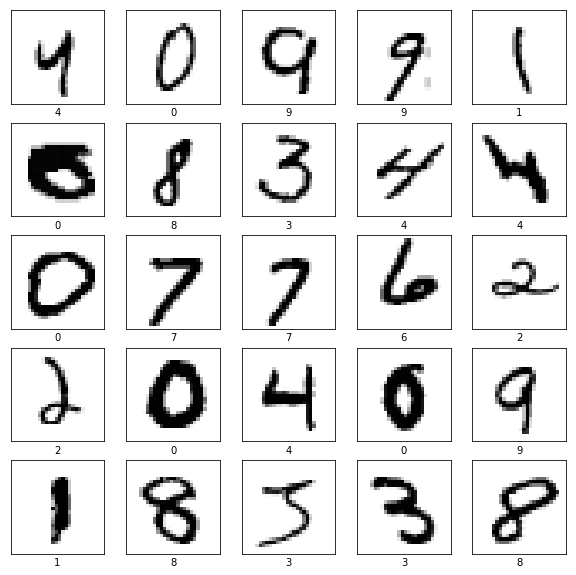

In [32]:
# classes for title
# num classes for amount of examples
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

# Mise en place du réseau de neurones

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrainement du model

In [37]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
29400/29400 [==============================] - 2s 64us/sample - loss: 0.0492 - acc: 0.9853
Epoch 2/50
29400/29400 [==============================] - 2s 64us/sample - loss: 0.0385 - acc: 0.9888
Epoch 3/50
29400/29400 [==============================] - 2s 65us/sample - loss: 0.0309 - acc: 0.9908
Epoch 4/50
29400/29400 [==============================] - 2s 65us/sample - loss: 0.0238 - acc: 0.9934
Epoch 5/50
29400/29400 [==============================] - 2s 66us/sample - loss: 0.0199 - acc: 0.9946
Epoch 6/50
29400/29400 [==============================] - 2s 65us/sample - loss: 0.0135 - acc: 0.9966
Epoch 7/50
29400/29400 [==============================] - 2s 63us/sample - loss: 0.0136 - acc: 0.9963
Epoch 8/50
29400/29400 [==============================] - 2s 64us/sample - loss: 0.0107 - acc: 0.9974
Epoch 9/50
29400/29400 [==============================] - 2s 65us/sample - loss: 0.0108 - acc: 0.9970
Epoch 10/50
29400/29400 [==============================] - 2s 63us/sample - loss: 

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

12600/12600 [==============================] - 0s 32us/sample - loss: 0.1594 - acc: 0.9746
Test accuracy: 0.9746032


In [0]:
predictions = model.predict(x_test)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

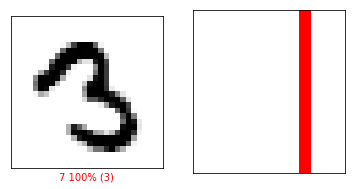

In [50]:
i = 98
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()